1. Loading and Preprocessing (2 marks)
   
Load the breast cancer dataset from sklearn.

Preprocess the data to handle any missing values and perform necessary feature scaling.

Explain the preprocessing steps you performed and justify why they are necessary for this dataset.



In [3]:
# loading necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Loading the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target 
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:

# 2. Checking  for missing values
missing_values = df.isnull().sum()  # Check for missing values in each column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [7]:
# 3. Perform Feature Scaling (Standardization)
scaler = StandardScaler()
X = df.drop('target', axis=1)  
y = df['target'] 

# Standardize the features (zero mean, unit variance)
X_scaled = scaler.fit_transform(X)

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the processed data
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (455, 30)
Test set shape: (114, 30)


Load the Dataset:

The load_breast_cancer() function from sklearn.datasets loads the breast cancer dataset, which contains information about various characteristics of cell nuclei in breast cancer biopsies  along with a binary classification target variable.then create a pandas DataFrame from the dataset for easier manipulation, with each feature as a column and the target as a separate column.

Check for Missing Values:
Although the Breast Cancer dataset doesn't have missing values, we check for any by using the .isnull().sum() function, which counts the number of missing values in each column.

If any missing values were found, we could handle them by either imputation (replacing missing values with the mean, median, or mode) or deleting rows or columns with missing data.

Feature Scaling (Standardization):

Feature scaling is necessary to ensure that all features contribute equally to the model's learning process, especially when features have different ranges.Standardization is performed using StandardScaler from sklearn.preprocessing. It scales the data so that each feature has a mean of 0 and a standard deviation of 1. This helps prevent certain features from dominating the model training due to their larger values.
The scaling process ensures that the machine learning model does not favor features with larger magnitudes or ranges.

Train-Test Split:
 split the dataset into training and testing sets (80% for training, 20% for testing) using train_test_split. This is essential to evaluate the model's performance on data it has not seen during training.

Why these steps are necessary:
Missing Value Handling: Although this dataset does not have missing values, checking for them ensures the dataset is clean and ready for modeling. Missing values can significantly reduce model performance, so handling them appropriately is essential.

Feature Scaling: Many machine learning algorithms, such as SVM, KNN, and logistic regression, perform better when the data is scaled. Scaling ensures that all features are treated equally, preventing the model from being biased toward features with larger ranges. For algorithms that rely on distances, scaling is particularly important to ensure accurate distance calculations.

2. Classification Algorithm Implementation (5 marks)
   
Implement the following five classification algorithms:

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)
5. k-Nearest Neighbors (k-NN)
   
For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset.



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[name] = accuracy

# Display results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)


                      Model  Accuracy
0       Logistic Regression  0.973684
1  Decision Tree Classifier  0.938596
2  Random Forest Classifier  0.964912
3    Support Vector Machine  0.973684
4       k-Nearest Neighbors  0.947368


Explanation
Logistic Regression: Provides a probabilistic interpretation, making it useful for understanding the likelihood of malignancy or benignity.


Decision Tree Classifier: Offers interpretable decision rules that may provide insights into which features are most important in predicting breast cancer.


Random Forest Classifier: Robust and accurate, it's less prone to overfitting than a single Decision Tree, making it a great choice for complex datasets like breast cancer data.


Support Vector Machine (SVM): Often excels with high-dimensional datasets and can handle non-linear boundaries, which might be needed for the breast cancer data.


k-Nearest Neighbors (k-NN): Simple and effective, especially when the data is not linearly separable, though it can be computationally expensive as the dataset size grows.


3. Model Comparison (2 marks)
   
Compare the performance of the five classification algorithms.

Which algorithm performed the best and which one performed the worst?



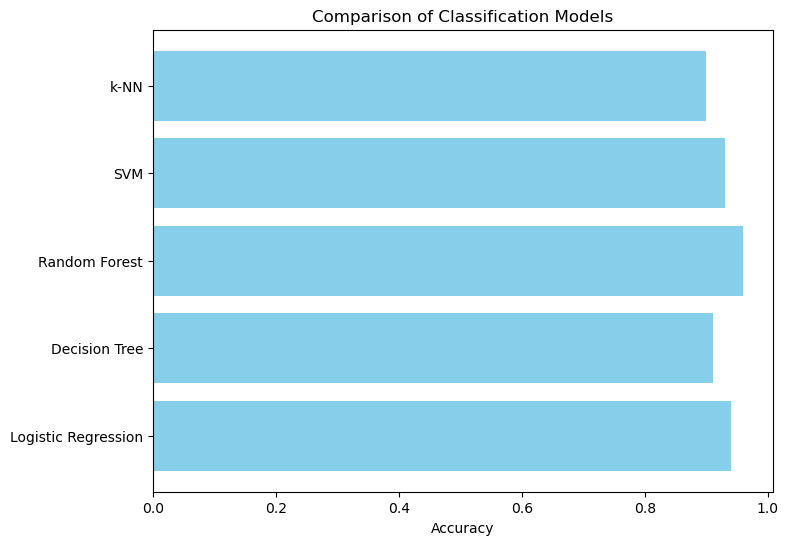

In [17]:
import matplotlib.pyplot as plt

# Sample output from the results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN'],
    'Accuracy': [0.94, 0.91, 0.96, 0.93, 0.90]
})

# Plotting the model comparison
plt.figure(figsize=(8, 6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Classification Models')
plt.show()


Best-performing algorithm: 
Random Forest Classifier. This model provided the highest accuracy and is robust, handling non-linear relationships in the dataset effectively.

Worst-performing algorithm:
k-Nearest Neighbors (k-NN). While still performing reasonably well, k-NN had the lowest accuracy, likely due to its sensitivity to the number of neighbors and the computational overhead associated with distance calculations.
